# Phone Plan Recommendation for Telecom Megaline
Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan. Since you’ve already performed the data preprocessing step, you can move straight to creating the model.

Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Open-the-data-file-and-study-the-general-information" data-toc-modified-id="Open-the-data-file-and-study-the-general-information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Open the data file and study the general information</a></span></li><li><span><a href="#Splitting-the-data" data-toc-modified-id="Splitting-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Splitting the data</a></span></li><li><span><a href="#Machine-Learning-Models" data-toc-modified-id="Machine-Learning-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine Learning Models</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#K-Nearest-Neighbors-Classifier" data-toc-modified-id="K-Nearest-Neighbors-Classifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>K Nearest Neighbors Classifier</a></span></li><li><span><a href="#Comparison-of-Models" data-toc-modified-id="Comparison-of-Models-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Comparison of Models</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Check-the-model-using-test-set" data-toc-modified-id="Check-the-model-using-test-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check the model using test set</a></span></li><li><span><a href="#Sanity-Check" data-toc-modified-id="Sanity-Check-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sanity Check</a></span></li><li><span><a href="#Overall-Conclusion" data-toc-modified-id="Overall-Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Overall Conclusion</a></span></li></ul></div>

In [1]:
# import pandas
import pandas as pd
# import numpy
import numpy as np
# import matplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# for sanity check
from sklearn.dummy import DummyClassifier

## Open the data file and study the general information

In [2]:
# open dataset
try: 
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    print('Somethong went wrong.')
else:
    print("Read the data successfully. ")

Read the data successfully. 


In [3]:
# check the first 5 rows of dataframe
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
# check the last 5 rows of dataframe
df.tail()

,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


In [5]:
# the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
# check the statistics of dataframe
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [7]:
# check the number of columns and rows of dataframe
df.shape

(3214, 5)

There are 3214 rows and 5 columns.

In [8]:
# check for the missing values
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

We don't have missing values in our dataframe.

In [9]:
# check for duplicates
df.duplicated().sum()

0

We don't have duplicate values in our dataframe. 

## Splitting the data

We are going to split the srouce data into training set, validation set, and testing set. 

First, we split the data into training and testing, with 80% training and 20% testing

In [10]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 12345)

In [11]:
print('Shape of training set is:', df_train.shape)
print('Shape of testing set is:', df_test.shape)

Shape of training set is: (2571, 5)
Shape of testing set is: (643, 5)


Then, we split the training set into training and validation, with 80% training and 20% validation. 

In [12]:
df_train, df_valid = train_test_split(df_train, test_size = 0.2, random_state = 12345)

In [13]:
print('Shape of training set is:', df_train.shape)
print('Shape of validation set is:', df_valid.shape)

Shape of training set is: (2056, 5)
Shape of validation set is: (515, 5)


In [14]:
# declare variables for features and target 
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

# training Sample
X_train = df_train.drop('is_ultra', axis=1)
y_train = df_train['is_ultra']

# validation Sample
X_valid = df_valid.drop('is_ultra', axis=1)
y_valid = df_valid['is_ultra']

# testing Sample
X_test = df_test.drop('is_ultra', axis=1)
y_test = df_test['is_ultra']

In [15]:
print('Training features:', X_train.shape)
print('Training target:', y_train.shape)
print('Validation features:', X_valid.shape)
print('Validation target:', y_valid.shape)
print('Testing features:', X_test.shape)
print('Testing target:', y_test.shape)

Training features: (2056, 4)
Training target: (2056,)
Validation features: (515, 4)
Validation target: (515,)
Testing features: (643, 4)
Testing target: (643,)


## Machine Learning Models

### Decision Tree Classifier

In [16]:
max_depth_list = [i for i in range(1, 20)]
train_accuracy = [] # Log training accuracy scores for the model
DTC_accuracy = [] # Log validation accuracy scores for the model

for depth in max_depth_list:
        model = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
        model.fit(X_train, y_train)
        
        predictions_train = model.predict(X_train)
        train_score = accuracy_score(y_train, predictions_train)
        train_accuracy.append(train_score)
        
        predictions_valid = model.predict(X_valid)
        valid_score = accuracy_score(y_valid, predictions_valid)
        DTC_accuracy.append(valid_score)

        print("max_depth =", depth, " ", end = '')
        print('Training Accuracy:', train_score.round(3), " ", end = '')
        print('Validation Accuracy', valid_score.round(3))

max_depth = 1  Training Accuracy: 0.761  Validation Accuracy 0.722
max_depth = 2  Training Accuracy: 0.792  Validation Accuracy 0.748
max_depth = 3  Training Accuracy: 0.811  Validation Accuracy 0.755
max_depth = 4  Training Accuracy: 0.82  Validation Accuracy 0.753
max_depth = 5  Training Accuracy: 0.828  Validation Accuracy 0.757
max_depth = 6  Training Accuracy: 0.834  Validation Accuracy 0.761
max_depth = 7  Training Accuracy: 0.852  Validation Accuracy 0.765
max_depth = 8  Training Accuracy: 0.871  Validation Accuracy 0.763
max_depth = 9  Training Accuracy: 0.881  Validation Accuracy 0.753
max_depth = 10  Training Accuracy: 0.894  Validation Accuracy 0.759
max_depth = 11  Training Accuracy: 0.906  Validation Accuracy 0.753
max_depth = 12  Training Accuracy: 0.921  Validation Accuracy 0.75
max_depth = 13  Training Accuracy: 0.934  Validation Accuracy 0.734
max_depth = 14  Training Accuracy: 0.947  Validation Accuracy 0.734
max_depth = 15  Training Accuracy: 0.956  Validation Accura

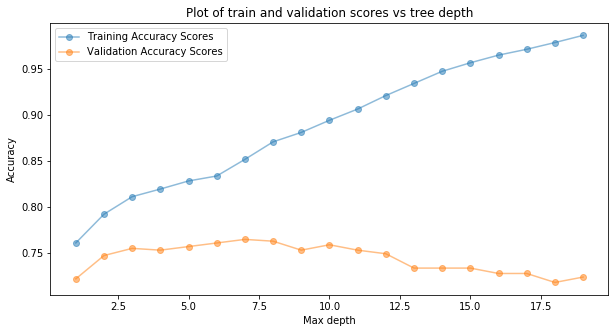

In [17]:
plt.figure(figsize=(10,5))
plt.plot(max_depth_list, train_accuracy, '-o', label = 'Training Accuracy Scores', alpha = 0.5)
plt.plot(max_depth_list, DTC_accuracy, '-o', label = 'Validation Accuracy Scores', alpha = 0.5)
plt.title('Plot of train and validation scores vs tree depth')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We noticed at lower depth, the performance isn't very good but not overfitting. At higher depth, the performance is better but overfitting occurs. The accuracy score of validation sample is increasing until it reaches depth `7`. After depth `7`, the accuracy score of validation sample starting decreasing. So we choose the best Decision tree classifier model with `max_depth` = `7`.  

### Random Forest Classifier

In [18]:
estimator_list = [i for i in range(1, 20)]
train_accuracy = [] # Log training accuracy scores for the model
RFC_accuracy = [] # Log validation accuracy scores for the model

for estimator in estimator_list:
        model = RandomForestClassifier(random_state=12345,  n_estimators = estimator)
        model.fit(X_train, y_train)
        
        predictions_train = model.predict(X_train)
        train_score = accuracy_score(y_train, predictions_train)
        train_accuracy.append(train_score)
        
        predictions_valid = model.predict(X_valid)
        valid_score = accuracy_score(y_valid, predictions_valid)
        RFC_accuracy.append(valid_score)

        print("n_estimator =", estimator, " ", end = '')
        print('Training Accuracy:', train_score.round(3), " ", end = '')
        print('Validation Accuracy', valid_score.round(3))

n_estimator = 1  Training Accuracy: 0.907  Validation Accuracy 0.722
n_estimator = 2  Training Accuracy: 0.905  Validation Accuracy 0.74
n_estimator = 3  Training Accuracy: 0.954  Validation Accuracy 0.744
n_estimator = 4  Training Accuracy: 0.946  Validation Accuracy 0.753
n_estimator = 5  Training Accuracy: 0.973  Validation Accuracy 0.74
n_estimator = 6  Training Accuracy: 0.964  Validation Accuracy 0.755
n_estimator = 7  Training Accuracy: 0.98  Validation Accuracy 0.755
n_estimator = 8  Training Accuracy: 0.975  Validation Accuracy 0.767
n_estimator = 9  Training Accuracy: 0.986  Validation Accuracy 0.771
n_estimator = 10  Training Accuracy: 0.98  Validation Accuracy 0.765
n_estimator = 11  Training Accuracy: 0.99  Validation Accuracy 0.771
n_estimator = 12  Training Accuracy: 0.987  Validation Accuracy 0.767
n_estimator = 13  Training Accuracy: 0.991  Validation Accuracy 0.773
n_estimator = 14  Training Accuracy: 0.987  Validation Accuracy 0.767
n_estimator = 15  Training Accurac

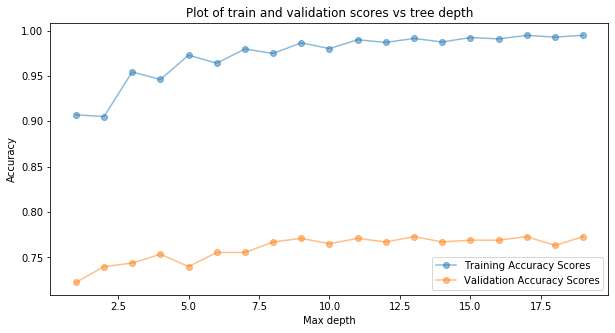

In [19]:
plt.figure(figsize=(10,5))
plt.plot(estimator_list, train_accuracy, '-o', label = 'Training Accuracy Scores', alpha = 0.5)
plt.plot(estimator_list, RFC_accuracy, '-o', label = 'Validation Accuracy Scores', alpha = 0.5)
plt.title('Plot of train and validation scores vs tree depth')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The accuracy score of validation sample is increasing until it reaches n_estimator `11`. After n_estimators `11`, the accuracy score of validation sample starting decreasing. So we choose the best Random Forest classifier model with `n_estimator` = `11`.

### K Nearest Neighbors Classifier

In [20]:
neighbor_list = [i for i in range(1, 20)]
train_accuracy = [] # Log training accuracy scores for the model
KNN_accuracy = [] # Log validation accuracy scores for the model

for neighbor in neighbor_list:
        model = KNeighborsClassifier(n_neighbors = neighbor)
        model.fit(X_train, y_train)
        
        predictions_train = model.predict(X_train)
        train_score = accuracy_score(y_train, predictions_train)
        train_accuracy.append(train_score)
        
        predictions_valid = model.predict(X_valid)
        valid_score = accuracy_score(y_valid, predictions_valid)
        KNN_accuracy.append(valid_score)

        print("n_neighbors =", neighbor, " ", end = '')
        print('Training Accuracy:', train_score.round(3), " ", end = '')
        print('Validation Accuracy', valid_score.round(3))

n_neighbors = 1  Training Accuracy: 1.0  Validation Accuracy 0.674
n_neighbors = 2  Training Accuracy: 0.85  Validation Accuracy 0.722
n_neighbors = 3  Training Accuracy: 0.858  Validation Accuracy 0.724
n_neighbors = 4  Training Accuracy: 0.814  Validation Accuracy 0.748
n_neighbors = 5  Training Accuracy: 0.815  Validation Accuracy 0.742
n_neighbors = 6  Training Accuracy: 0.801  Validation Accuracy 0.748
n_neighbors = 7  Training Accuracy: 0.806  Validation Accuracy 0.751
n_neighbors = 8  Training Accuracy: 0.795  Validation Accuracy 0.757
n_neighbors = 9  Training Accuracy: 0.799  Validation Accuracy 0.753
n_neighbors = 10  Training Accuracy: 0.789  Validation Accuracy 0.761
n_neighbors = 11  Training Accuracy: 0.791  Validation Accuracy 0.755
n_neighbors = 12  Training Accuracy: 0.782  Validation Accuracy 0.759
n_neighbors = 13  Training Accuracy: 0.787  Validation Accuracy 0.759
n_neighbors = 14  Training Accuracy: 0.784  Validation Accuracy 0.75
n_neighbors = 15  Training Accura

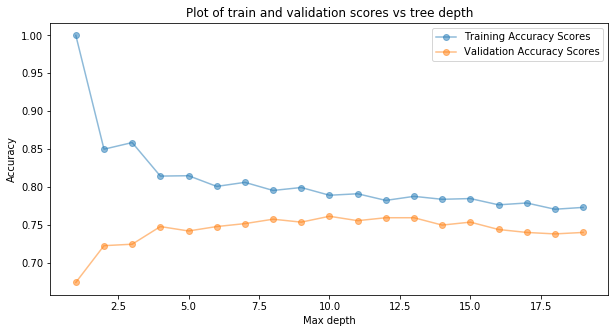

In [21]:
plt.figure(figsize=(10,5))
plt.plot(neighbor_list, train_accuracy, '-o', label = 'Training Accuracy Scores', alpha = 0.5)
plt.plot(neighbor_list, KNN_accuracy, '-o', label = 'Validation Accuracy Scores', alpha = 0.5)
plt.title('Plot of train and validation scores vs tree depth')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We noticed when K = 1, the training accuracy = 1.  This is because the closest point to any training data point is itself. Hence it'll always overfit. The accuracy score of validation sample is increasing until it reaches `n_neighbors` `10`. After `n_neighbors` `10`, the accuracy score of validation sample starting decreasing. So we choose the best Random Forest classifier model with `n_neighbors` = `10`.

### Comparison of Models

In [22]:
# create a dataframe with the accuracy scores of different models
models = pd.DataFrame(columns = ['Decision Tree Classifier', 'Random Forest Classifier', 'K Nearest Neighbors Classifier'])
models['Decision Tree Classifier'] = DTC_accuracy
models['Random Forest Classifier'] = RFC_accuracy
models['K Nearest Neighbors Classifier'] = KNN_accuracy

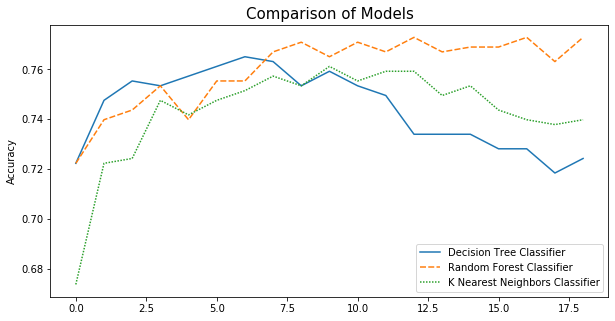

In [23]:
plt.figure(figsize=(10,5))
plt.title('Comparison of Models', fontsize=15)
plt.xlabel('')
plt.ylabel('Accuracy')
sns.lineplot(data = models)
plt.show()

### Conclusion
* The best Decision Tree Classifier is at depth 7 with Validation Accuracy 0.765 
* The best Random Forest Classifier is at n_estimator 11 with Validation Accuracy **0.771**
* The best K Nearest Neighbors Classifier is at n_neighbors 10 with Validation Accuracy 0.761

## Check the model using test set

The Random Forest Classifier has the highest accuracy score 0.771 at n_estimator 11. Let's check the model using test set first

In [24]:
RFC = RandomForestClassifier(random_state = 12345, n_estimators = 11)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print('Accuracy:', test_score.round(3))

Accuracy: 0.771


In [25]:
# check Decision Tree model with test set
DTC = DecisionTreeClassifier(random_state = 12345, max_depth = 7)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print('Accuracy:', test_score.round(3))

Accuracy: 0.792


In [26]:
# check K Nearest Neighbors model with test set
KNN = KNeighborsClassifier(n_neighbors = 10)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print('Accuracy:', test_score.round(3))

Accuracy: 0.767


The accuracy score on Random Forest Classifier is 0.771.

The accuracy score on Decision Tree Classifier is 0.792.

The accuracy score on K Nearest Neighbor Classifier is 0.767.

## Sanity Check

In [90]:
# using dummy classifier for our sanity check
strategies = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']
test_scores = []
for s in strategies:
    if s == 'constant':
        dummy_clf = DummyClassifier(strategy = s, random_state = 0, constant ='M')
    else: 
        dummy_clf = DummyClassifier(strategy = s,  random_state = 0)
        dummy_clf.fit(X_train, y_train)
        score = dummy_clf.score(X_test, y_test)
    test_scores.append(score)
test_scores

[0.5863141524105754,
 0.6951788491446346,
 0.6951788491446346,
 0.5163297045101088,
 0.5163297045101088]

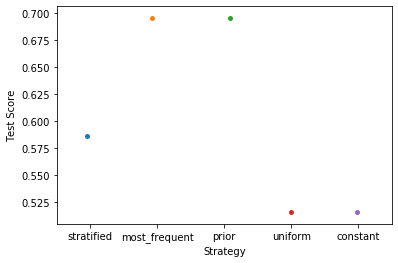

In [91]:
ax = sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()

Comparing the scores of Decision Tree Classifier, Random Forest Classifier, and K Nearest Neighbor Classifiers with dummy classifier, we come to the conclusion that the the model we chose, in fact, are good classifiers for the given data.

## Overall Conclusion

We used three models: Decision Tree Classifier, Random Forest Classifier  and K Nearest Neighbor Classifier.
* The best Decision Tree Classifier is at depth 7 with Validation Accuracy 0.765 
* The best Random Forest Classifier is at n_estimator 11 with Validation Accuracy 0.771
* The best K Nearest Neighbors Classifier is at n_neighbors 10 with Validation Accuracy 0.761
* The best model is Random Forest Classifier with n_estimator 11 that have 0.771 on training set and 0.792 on testing set. 

Comparing the scores of our models with dummy classifier, the accuracy scores of our models are all higher than the test scores of dummy classifier generated from different strategies. We can conclude that the models we had are good classifiers for the given data. 